***
***
***

<br><h2>Timed Unsupervised Learning Project | Windows vs Mac</h2>

*DAT-5303 | Machine Learning*<br>
Team 3 - Neel Roshania | Omosalewa Oyagbola | Salomon Isaac Alvarado Claros | Shanna FNU | Shresth Sethi | Sunlong Ngouv <br>|
Hult International Business School<br><br><br>
25 March 2020

***
***
***

In [3]:
%autosave 60

# datascience essentials
import pandas                as pd
import numpy                 as np
import matplotlib.pyplot     as plt
import seaborn               as sns
import ipywidgets            as widgets
from ipywidgets              import AppLayout, HTML, Layout

# unsupervised learning
from sklearn                 import preprocessing
from sklearn.decomposition   import PCA
from sklearn.cluster         import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms

Autosaving every 60 seconds


# Introduction

## Stakeholder Address
This document has been structured for business and technical stakeholders.
1. Business stakeholders can refer to section 1, 7 and 8
2. Data Science stakeholders can refer to section 2, 3, 4, 5, and 6

## Project Question: Windows or Mac?**

**Aim**: To analyze and interpret an unsupervised learning problem based on survey data for Microsoft. 

**Background**: Microsoft has decided to approach this question from the perspective of the Big Five personality traits as well as the Hult DNA to identify consumer buying behavior.

**WHY**: Apple (AAPL) and Microsoft (MSFT) have been rigorously researching several aspects of consumer buying behavior in regards to the decision making behind this question.

**Assumption**: This data, including its demographics, are representative of the population Microsoft is attempting to study.


## Big 5 Personality Traits

- **Extroversion (E)** is the personality trait of seeking fulfillment from sources outside the self or in community. High scorers tend to be very social while low scorers prefer to work on their projects alone.<br>
- **Agreeableness (A)** reflects much individuals adjust their behavior to suit others. High scorers are typically polite and like people. Low scorers tend to 'tell it like it is'.<br>
- **Conscientiousness (C)** is the personality trait of being honest and hardworking. High scorers tend to follow rules and prefer clean homes. Low scorers may be messy and cheat others.<br>
- **Neuroticism (N)** is the personality trait of being emotional.<br>
- **Openness to Experience (O)** is the personality trait of seeking new experience and intellectual pursuits. High scores may day dream a lot. Low scorers may be very down to earth.<br>

## Hult DNA Personality Traits

The Hult DNA represents personality and leadership  traits that are sought after by employers. The MSFT survey questions where defined under the three critical competencies (Thinking | Communicating | Team Building) and a calculation developed by classifying and quantifying the 9 Hult DNA behavioral skills.
- **Thinking** is the trait of being 'self-aware', having the ability to 'embrace change' and being a 'dynamic thinker'. High scorers tend to be innovative people with a hunger for knowledge.<br>
- **Communicating** reflects an individual's ability to 'speak and listen skillfully', 'influence confidently' and 'present ideas effectively'. High scorers tend to be confident people who do not shy away from conflict.<br>
- **Team Building** reflects the ability to 'build collaborative relationships', 'inspire and motivate' and 'resolve conflict constructively'. High scorers tend to be resilient, collaborative and trusting people .<br>

# Ingestion

In [4]:
df_original = pd.read_excel("Survey_Data_Final_Exam.xlsx")
df = df_original.copy()

In [5]:
# field definitions
extrovered_col_index              = [1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
agreeableness_col_index           = [2, 7, 12, 17, 22, 27, 32, 37, 42, 47]
conscientiousness_col_index       = [3, 8, 13, 18, 23, 28, 33, 38, 43, 48]
neuroticism_col_index             = [4, 9, 14, 19, 24, 29, 34, 39, 44, 49]
open_to_new_experiences_col_index = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
hult_dna_col_index                = np.arange(51, 72, 1)
demographics_col_index            = np.arange(72, 78, 1)

# Function Definitions

In [6]:
# outlier and threshold mapping  
def threshold_outlier_flagging(dataframe, feature, threshold_val, threshold_type, bound):
#     automate outlier and flagging process
    if threshold_type == 'outlier':
        if bound == 'high':
            _out_label = "out_{}_hi".format(feature)
            dataframe.loc[:, _out_label] = 0
            for index, val in dataframe.iterrows(): 
                if dataframe.loc[index, feature] > threshold_val:
                    dataframe.loc[index, _out_label] = 1
        elif bound == "low":
            _out_label = "out_{}_lo".format(feature)
            dataframe.loc[:, _out_label] = 0
            for index, val in dataframe.iterrows(): 
                if dataframe.loc[index, feature] < threshold_val:
                    dataframe.loc[index, _out_label] = 1
        else:
            print("Outlier flagging failed")
            
    elif threshold_type == 'threshold':
        if bound == 'high':
            _out_label = "flag_{}_hi".format(feature)
            dataframe.loc[:, _out_label] = 0
            for index, val in dataframe.iterrows(): 
                if dataframe.loc[index, feature] > threshold_val:
                    dataframe.loc[index, _out_label] = 1
        elif bound == "low":
            _out_label = "flag_{}_lo".format(feature)
            dataframe.loc[:, _out_label] = 0
            for index, val in dataframe.iterrows(): 
                if dataframe.loc[index, feature] < threshold_val:
                    dataframe.loc[index, _out_label] = 1
        else:
            print("Threshold flagging failed")
            
    elif threshold_type == 'trend':
        _out_label = "trend_{}".format(feature)
        dataframe.loc[:, _out_label] = 0
        for index, val in dataframe.iterrows(): 
            if dataframe.loc[index, feature] == threshold_val:
                dataframe.loc[index, _out_label] = 1

In [7]:
########################################
# pca_plotter
########################################
# optional color scheme
colors_lst = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]


# pca_plotter
def pca_plotter(bunch, colors = None):
    """
PARAMETERS
----------
bunch        : Bunch object to be used in PCA
colors       : color coding for target labels, default None
"""

    # INSTANTIATING a PCA object
    pca = PCA(n_components = 2,
              random_state = 802)


    # FITTING and TRANSFORMING the data
    dataset_pca = pca.fit_transform(bunch.data)

    
    # setting figure options
    plt.figure(figsize=(10, 10))
    plt.xlim(dataset_pca[:, 0].min(), dataset_pca[:, 0].max())
    plt.ylim(dataset_pca[:, 1].min(), dataset_pca[:, 1].max())


    # data vizualization
    for i in range(len(bunch.data)):

        plt.text(dataset_pca[i, 0],
                 dataset_pca[i, 1],
                 str(bunch.target[i]),
                 color = colors[bunch.target[i]],
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xlabel("First principal component")
    plt.ylabel("Second principal component")
    plt.show()

    
########################################
# tsne_plotter
########################################
# optional color scheme
colors_lst = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525",
              "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]


# tsne_plotter
def tsne_plotter(bunch, colors = None):
    """
PARAMETERS
----------
bunch        : Bunch object to be used in TSNE
colors       : color coding for target labels, default None
"""
    
    # INSTANTIATING a PCA object
    tsne = TSNE(random_state = 508)

    
    # FITTING and TRANSFORMING the data
    dataset_tsne = tsne.fit_transform(bunch.data)

    
    # setting figure options
    plt.figure(figsize=(10, 10))
    plt.xlim(dataset_tsne[:, 0].min(), dataset_tsne[:, 0].max() + 1)
    plt.ylim(dataset_tsne[:, 1].min(), dataset_tsne[:, 1].max() + 1)

    
    # data vizualization
    for i in range(len(bunch.data)):

        plt.text(dataset_tsne[i, 0],
                 dataset_tsne[i, 1],
                 str(bunch.target[i]),
                 color = colors[bunch.target[i]],
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xlabel("t-SNE feature 0")
    plt.xlabel("t-SNE feature 1")
    plt.show()

########################################
# inertia
########################################
def interia_plot(data, max_clust = 50):
    """
PARAMETERS
----------
data      : DataFrame, data from which to build clusters. Dataset should be scaled
max_clust : int, maximum of range for how many clusters to check interia, default 50
    """

    ks = range(1, max_clust)
    inertias = []


    for k in ks:
        # INSTANTIATING a kmeans object
        model = KMeans(n_clusters = k)


        # FITTING to the data
        model.fit(data)


        # append each inertia to the list of inertias
        inertias.append(model.inertia_)



    # plotting ks vs inertias
    fig, ax = plt.subplots(figsize = (12, 8))
    plt.plot(ks, inertias, '-o')


    # labeling and displaying the plot
    plt.xlabel('number of clusters, k')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()


########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()

# Data Cleansing

## Procedure
1. Handle missing values
2. Handle dirty data
3. Flag outlier values

## Notes
The following fields were dropped entirely out of the dataset
1. Nationality - We have aggregated data by region


## Execution

Missing values in "What is you ethnicity?" replaced with "NA"

In [8]:
# observe missing values
df.isna().sum()[(df.isna().sum() > 0) == True]
df.iloc[:, 78].fillna("NA", inplace=True)

Replace MAC with Macbook in both laptop related questions

In [9]:
# What laptop would you currently have?
df["What laptop do you currently have?"] = df["What laptop do you currently have?"].replace(to_replace=
    {"MAC"         : "Macbook",
    "Chromebook"  : "Windows",
    "Windows laptop": "Windows"})

# What laptop would you buy in next assuming if all laptops cost the same?
df["What laptop would you buy in next assuming if all laptops cost the same?"] = df["What laptop would you buy in next assuming if all laptops cost the same?"].replace(to_replace=
    {"MAC"         : "Macbook",
    "Chromebook"  : "Windows",
    "Windows laptop": "Windows"})

Replaced ethnicity with readable class labels

In [10]:
df.replace({"What is your ethnicity?": {
    "White / Caucasian"     : "white_caucasian",
    "Far east Asian"        : "far_east_asian",
    "West Asian / Indian"   : "west_asian_indian",
    "Hispanic / Latino"     : "hispanic_latino",
    "Prefer not to answer"  : "prefer_no_answer",
    "African American"      : "african_american",
    "Native American"       : "native_american",
    "Middle Eastern"        : "middle_eastern"}
}, inplace=True)

Students below 25 and over 35 are considered outliers because they don't constitute as the majority of those who took the survey

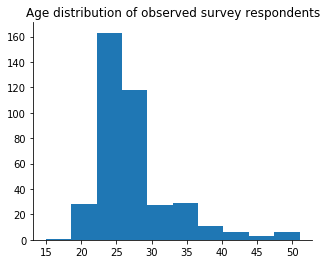

In [11]:
# visualize ages
fig = plt.figure(figsize=(5, 4))
ax_1 = plt.subplot(1, 1, 1)

ax_1.hist(df.iloc[:, 75])

ax_1.spines['right'].set_visible(False)
ax_1.spines['top'].set_visible(False)
ax_1.set_title("Age distribution of observed survey respondents")

plt.show()

# flag outliers
threshold_outlier_flagging(df, "What is your age?", 25, "outlier", "low")
threshold_outlier_flagging(df, "What is your age?", 35, "outlier", "high")

Replace repeated questions with the average of their values

In [12]:
# replace column with average of two
for col1, col2 in [(56, 59), (55, 58), (57, 60)]:
    df.iloc[:, col1] = (df.iloc[:, col1]/2 + df.iloc[:, col2]/2)

# drop repeated columns
df.drop(df.columns.values[58:61], inplace=True, axis=1)

Demographic column indexes show no sign of dirt data

In [13]:
# # # observe and clean dirty data
# for i in demographics_col_index:
#     print("\n--------------------------")
#     print(df.iloc[:, i].value_counts())

In [14]:
# drop columns
df.drop([
    "What is your nationality? ",
    ],
    axis = 1,
    inplace = True
)

# Feature Engineering

## Binary Transformations

Binary transformed the features of the following questions,
1. What laptop do you currently have? 
2. What laptop would you buy in next assuming if all laptops cost the same?
3. What program are you in?  
4. What is your gender?
5. What is your ethnicity?

***After later consideration, the above transformations were not considered due to the nature of the required data frame for analysis**

In [15]:
# get dummy variables for current and desired laptop
# laptop_dummies      = pd.get_dummies(df.iloc[:, [69, 70]], prefix=["fe_current", "fe_desired"])
# program_dummies     = pd.get_dummies(df.iloc[:, [71]], prefix=["fe_program"])
# gender_dummies      = pd.get_dummies(df.iloc[:, [73]], prefix=["fe_gender_"])
# ethnicity_dummies   = pd.get_dummies(df.iloc[:, [74]], prefix=["fe_ethinicity"])

# concat dummies
df_clean_dummies = pd.concat(
    # [df, laptop_dummies, program_dummies, gender_dummies, ethnicity_dummies],
#     [df, laptop_dummies, program_dummies],
    [df],
    axis=1
)

## Big 5 personality traits

In [16]:
# column mapping
extrovered_col_index = [1, 6, 11, 16, 21, 26, 31, 36, 41, 46]
agreeableness_col_index = [2, 7, 12, 17, 22, 27, 32, 37, 42, 47]
conscientiousness_col_index = [3, 8, 13, 18, 23, 28, 33, 38, 43, 48]
neuroticism_col_index = [4, 9, 14, 19, 24, 29, 34, 39, 44, 49]
open_to_new_experiences_col_index = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
hult_dna_col_index = np.arange(51, 72, 1)

# question mapping
extroverted_questions = df_clean_dummies.columns[extrovered_col_index]
agreeableness_questions = df_clean_dummies.columns[extrovered_col_index]
conscientiousness_questions = df_clean_dummies.columns[extrovered_col_index]
neuroticism_questions = df_clean_dummies.columns[extrovered_col_index]
open_to_new_experiences_questions = df_clean_dummies.columns[extrovered_col_index]

# define lambda functions to determine degree of personality
get_extroverted_score =             lambda l: np.sum([20,  l[0], -l[1],  l[2], -l[3],  l[4], -l[5],  l[6], -l[7],  l[8], -l[9]])
get_agreeableness_score =           lambda l: np.sum([14, -l[0],  l[1], -l[2],  l[3], -l[4],  l[5], -l[6],  l[7],  l[8],  l[9]])
get_conscientiousness_score =       lambda l: np.sum([14,  l[0], -l[1],  l[2], -l[3],  l[4], -l[5],  l[6], -l[7],  l[8],  l[9]])
get_neuroticism_score =             lambda l: np.sum([38, -l[0],  l[1], -l[2],  l[3], -l[4], -l[5], -l[6], -l[7], -l[8], -l[9]])
get_open_to_new_experiences_score = lambda l: np.sum([8,   l[0], -l[1],  l[2], -l[3],  l[4], -l[5],  l[6],  l[7],  l[8],  l[9]])


In [17]:
df_clean_dummies["big_5_extrovertedness"] = 0
df_clean_dummies["big_5_agreeableness"] = 0
df_clean_dummies["big_5_conscientiousness"] = 0
df_clean_dummies["big_5_neuroticism"] = 0
df_clean_dummies["big_5_open_to_new_experiences"] = 0

# iterate between each row and scores to individual columns
for index, val in df_clean_dummies.iterrows():
    df_clean_dummies.loc[index, "big_5_extrovertedness"]         = get_extroverted_score(df_clean_dummies.iloc[index, extrovered_col_index].to_list())
    df_clean_dummies.loc[index, "big_5_agreeableness"]           = get_extroverted_score(df_clean_dummies.iloc[index, agreeableness_col_index].to_list())
    df_clean_dummies.loc[index, "big_5_conscientiousness"]       = get_extroverted_score(df_clean_dummies.iloc[index, conscientiousness_col_index].to_list())
    df_clean_dummies.loc[index, "big_5_neuroticism"]             = get_extroverted_score(df_clean_dummies.iloc[index, neuroticism_col_index].to_list())
    df_clean_dummies.loc[index, "big_5_open_to_new_experiences"] = get_extroverted_score(df_clean_dummies.iloc[index, open_to_new_experiences_col_index].to_list())

## Hult DNA personality traits

### Hult DNA calculations
Based on our assumptions on which trait each question falls under;
- Thinking:      50 - 51 + 52 + 53
- Communicating: 54 + 55 + 56 + 57 - 58 + 63
- Team Building: 59 + 60 + 61 - 62 + 64 + 65 + 66 + 67


In [18]:
# hult definitions
def_hult_thinking_index      = [50, 51, 52, 53] # correct
def_hult_communicating_index = [54, 55, 56, 57, 58, 63]
def_hult_team_building_index = [59, 60, 61, 62, 64, 65, 66, 67]

# define lambda functions to determine degree of hult_dimension
get_hult_thinking_score      =  lambda l: np.sum([0,  l[0], -l[1],  l[2],  l[3]])
get_hult_communicating_score =  lambda l: np.sum([0,  l[0],  l[1],  l[2],  l[3], -l[4], l[5]])
get_hult_team_building_score =  lambda l: np.sum([0,  l[0],  l[1],  l[2], -l[3],  l[4],  l[5],  l[6],  l[7]])

In [19]:
df_clean_dummies["hult_dna_thinking"]      = 0
df_clean_dummies["hult_dna_communicating"] = 0
df_clean_dummies["hult_dna_team_building"] = 0

# iterate between each row and scores to individual columns
for index, val in df_clean_dummies.iterrows():
    df_clean_dummies.loc[index, "hult_dna_thinking"]         = get_hult_thinking_score(df_clean_dummies.iloc[index, def_hult_thinking_index].to_list())
    df_clean_dummies.loc[index, "hult_dna_communicating"]    = get_hult_communicating_score(df_clean_dummies.iloc[index, def_hult_communicating_index].to_list())
    df_clean_dummies.loc[index, "hult_dna_team_building"]    = get_hult_team_building_score(df_clean_dummies.iloc[index, def_hult_team_building_index].to_list())

## Feature Scaling

In [20]:
# define columns for each dimension
big_5_columns = [
    'big_5_extrovertedness',
    'big_5_agreeableness',
    'big_5_conscientiousness',
    'big_5_neuroticism',
    'big_5_open_to_new_experiences']

huld_dna_columns = [
    'hult_dna_thinking',
    'hult_dna_communicating',
    'hult_dna_team_building']

# initialize data
data = df_clean_dummies.loc[:, big_5_columns+huld_dna_columns]

# instantiate, fit, transform
scaler = preprocessing.StandardScaler().fit(data)
scaled_columns = scaler.transform(data).round(3)

# replace columns with scaled values
df_clean_dummies.loc[:, big_5_columns+huld_dna_columns] = scaled_columns

# Unsupervised Statistical Modeling
The aim of this section is to use unsupervised learning to determine latent traits that have strong correlations with Big 5 and Hult DNA personality traits. This will be achieved by using
1. Principle Component Analysis (PCA)
2. K Mean Clustering

## PCA

In [21]:
# drop all columns before Big 5 personality traits
df_clean_dummies.drop(df_clean_dummies.columns[0:75], inplace = True, axis=1)

From the Scree Plot below, the optimzal number of components are 6

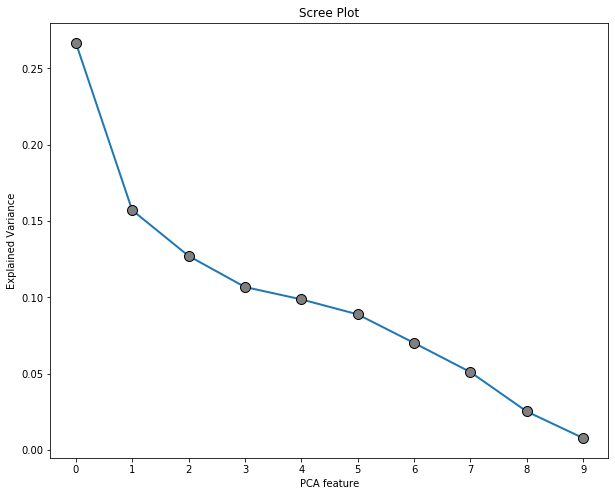

In [22]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 802)

# FITTING and TRANSFORMING the purchases_scaled
customer_pca = pca.fit_transform(df_clean_dummies)

# calling the scree_plot function
scree_plot(pca_object = pca)

## Factor loadings per feature

In [23]:
# Instantiate PCA
pca = PCA(n_components = 5,
          random_state = 802)

# Fit and transform
participant_pca = pca.fit_transform(df_clean_dummies)

# Factor loadings
factor_loadings = pd.DataFrame(pd.np.transpose(pca.components_))

# rename rows as original features
factor_loadings = factor_loadings.set_index(df_clean_dummies.columns)

## Factor loadings per customer

In [24]:
df_pca_factor_customer = pd.DataFrame(pca.transform(df_clean_dummies))

In [25]:
# RENAME columns based on interpretation
pca_component_names = ["Friendly Introvert", "Self-Aware", "Emotional", "Sensitive Extrovert", "Personable"]

_ = [i for i in range(0, len(df_pca_factor_customer.columns), 1)]
pca_rename_dict = dict(zip(_, pca_component_names)) 

# implement new component names
factor_loadings.columns = pca_component_names
df_pca_factor_customer.rename(columns=pca_rename_dict, inplace=True)

# Observ factor loadings
print(f"""

MAX Components Factor Loadings
------------------------------
{factor_loadings.round(2)}

""")



MAX Components Factor Loadings
------------------------------
                               Friendly Introvert  Self-Aware  Emotional  \
out_What is your age?_lo                    -0.03        0.01      -0.01   
out_What is your age?_hi                     0.00       -0.01       0.02   
big_5_extrovertedness                       -0.35        0.29      -0.31   
big_5_agreeableness                          0.46        0.18      -0.19   
big_5_conscientiousness                     -0.31       -0.33      -0.08   
big_5_neuroticism                            0.01       -0.29       0.73   
big_5_open_to_new_experiences               -0.41       -0.35      -0.20   
hult_dna_thinking                           -0.06        0.65       0.41   
hult_dna_communicating                      -0.41        0.39      -0.13   
hult_dna_team_building                      -0.48        0.05       0.32   

                               Sensitive Extrovert  Personable  
out_What is your age?_lo          

## PCA component interpretation

- <strong>Friendly Introvert</strong> is a polite person that is very friendly within their comfort zone but is closed to new experiences and constantly avoids conflict - therefore always compromising. That prevents the individual from communicating effectively and being productive  in teams.
- <strong>Self Aware</strong> is a confident, driven person, that has high emotional intelligence and communication skills. However may be closed to new experiences and occasionally deceive to get ahead.
- <strong>Emotional</strong> is an emotional individual that is sensitive to peoples differences and values to contributions of others; and constantly evolves by embracing feedback and change.
- <strong>Sensitive Extrovert</strong> is a social person. Their emotional personality leads them to seek fulfillment with a wider community and foster strong relationships.
- <strong>Personable</strong> is an honest and hard working person who is very relatable, self-disciplined and organized. 

## K Means

An initial observation of the dendogram below indicates 4 potentially usefull clusters

### Cluster identification

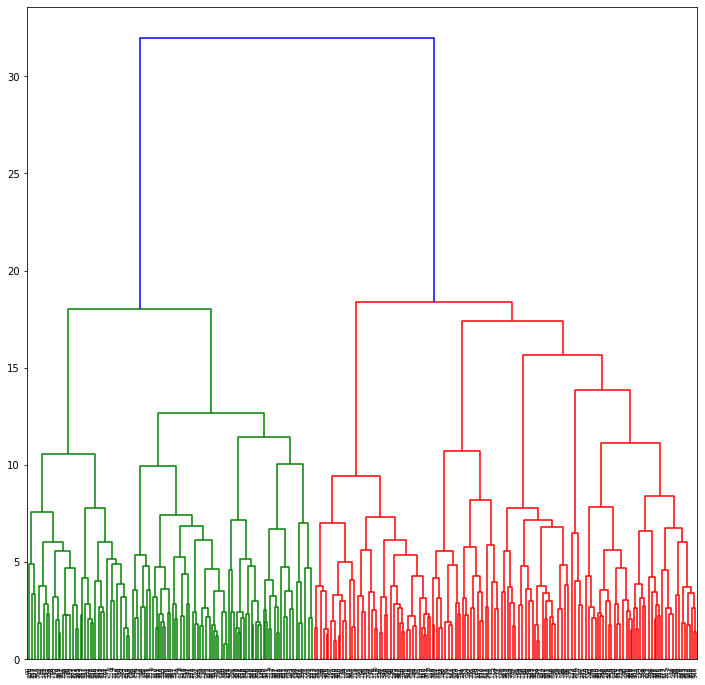

In [26]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = df_clean_dummies,
                                 method = 'ward')
# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)

# saving and displaying the plot
plt.show()

In [27]:
# Instantiating
survey_k_pca = KMeans(n_clusters = 4,
                         random_state = 802)

# fitting
survey_k_pca.fit(df_clean_dummies)

# prpcessing clusters to dataframe
customers_kmeans_pca = pd.DataFrame({'Cluster': survey_k_pca.labels_})

# append clusters to dataframe
# df_clean_dummies["cluster_category"] = customers_kmeans_pca.iloc[: , 0]

### Clusters classification

In [28]:
# get cluster centers
centroids_pca = survey_k_pca.cluster_centers_

# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)

# renaming principal components
centroids_pca_df.columns = df_clean_dummies.columns

# checking results (clusters = rows, pc = columns)
centroids_pca_df_T = centroids_pca_df.round(2).T

# rename clusters here
new_cluster_names = {
    0: "cluster_1", 
    1: "cluster_2", 
    2: "cluster_3", 
    3: "cluster_4"}

centroids_pca_df_T.rename(columns=new_cluster_names, inplace=True)
centroids_pca_df_T.to_csv("centroid_interpretation.csv")
centroids_pca_df_T

,cluster_1,cluster_2,cluster_3,cluster_4
out_What is your age?_lo,0.37,0.32,0.28,0.31
out_What is your age?_hi,0.10,0.08,0.03,0.08
big_5_extrovertedness,0.92,-0.06,-0.54,-0.53
big_5_agreeableness,-0.69,0.03,1.13,-0.10
big_5_conscientiousness,0.61,-0.57,-0.35,0.11
big_5_neuroticism,-0.30,0.46,-0.53,0.27
big_5_open_to_new_experiences,0.66,-0.63,-0.85,0.46
hult_dna_thinking,0.14,0.83,-0.03,-0.86
hult_dna_communicating,0.58,0.22,-0.82,-0.22
hult_dna_team_building,0.54,0.12,-1.14,0.13


## Final Data Merging - PCA components KMean clusters and Demographic

Concatenation of,
- Cluster column
- PCA component columns
- Demographic information
    - Gender
    - Ethnicity
    - Current OS
    - Desired OS

In [29]:
data_df = pd.concat([
    df_clean_dummies,
    df_pca_factor_customer,
    customers_kmeans_pca,
    df.iloc[:, [69, 70, 71, 72, 73, 74]],
], axis=1)

In [30]:
# rename columns
data_df.rename(columns={
    "What laptop do you currently have?": "current_OS",
    "What laptop would you buy in next assuming if all laptops cost the same?": "desired_OS",
    "What program are you in?": "program",
    "What is your ethnicity?": "ethinicity", 
    "Gender": "gender",
    "What is your age?": "age",
}, inplace=True)

demographic_features = data_df.iloc[:, [16, 17, 18, 19, 20]].columns

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 22 columns):
out_What is your age?_lo         392 non-null int64
out_What is your age?_hi         392 non-null int64
big_5_extrovertedness            392 non-null float64
big_5_agreeableness              392 non-null float64
big_5_conscientiousness          392 non-null float64
big_5_neuroticism                392 non-null float64
big_5_open_to_new_experiences    392 non-null float64
hult_dna_thinking                392 non-null float64
hult_dna_communicating           392 non-null float64
hult_dna_team_building           392 non-null float64
Friendly Introvert               392 non-null float64
Self-Aware                       392 non-null float64
Emotional                        392 non-null float64
Sensitive Extrovert              392 non-null float64
Personable                       392 non-null float64
Cluster                          392 non-null int32
current_OS                       392 

# Visualization

In [31]:
def g(Demographic, Persona):
    fig, ax = plt.subplots(figsize = (6, 6))
    sns.boxplot(x = Demographic,
                y = Persona,
                hue = 'Cluster',
                data = data_df)
    sns.despine()
    plt.tight_layout()
    plt.show()

In [32]:
# # Set up the figure

def f(Persona, Cluster_0, Cluster_1, Cluster_2, Cluster_3):
    
    # initialize cluster
    clusters_selected = []
    color_maps = ["Reds", "Blues", "Greens", "BuGn"]
    
    # select cluster
    if Cluster_0:
        clusters_selected.append(0)
    if Cluster_1:
        clusters_selected.append(1)
    if Cluster_2:
        clusters_selected.append(2)
    if Cluster_3:
        clusters_selected.append(3)
        
    # define data for selected cluster
    f, ax = plt.subplots(figsize=(6, 6))
    
    for cluster in clusters_selected:
        ax = sns.kdeplot(
            data_df.loc[data_df["Cluster"] == cluster, "age"], 
            data_df.loc[data_df["Cluster"] == cluster, Persona],
            cmap=color_maps[cluster], shade=True, shade_lowest=False)
        
    sns.despine()

In [33]:
from ipywidgets import AppLayout, HTML, Layout

introduction_text = """
    <br>
    <br>
    <h1>Team 3 Analytical Findings</h1>
    <h3>Machine Learning DAT5303</h3>
    <p>Neel Roshania | Omosalewa Oyagbola | Salomon Isaac Alvarado Claros | Shanna FNU | Shresth Sethi | Sunlong Ngouv </p>
    <p>Hult International Business School<p>
    <p>25 March 2020</p>
    <br>
    <br>
    <h4> Review demographic information by choice of persona below</h4>
    <br>
"""
introduction = HTML(introduction_text, layout = Layout(height='auto'))

viz2_text = """
    <h4> Observe clusters of personas by distrubution of age and choice of cluster below</h4>
"""
viz2 = HTML(viz2_text, layout = Layout(height='auto'))

per_persona = widgets.interactive(
    g, 
    Demographic=demographic_features, 
    Persona=pca_component_names
)

per_cluster_age = widgets.interactive(
    f, 
    Persona=pca_component_names, 
    Cluster_0=True, 
    Cluster_1=False, 
    Cluster_2=False, 
    Cluster_3=False)

# AppLayout Object
app_1 = AppLayout(
    header = introduction,
    left_sidebar = per_persona,
)

app_2 = AppLayout(
    header = viz2,
    left_sidebar = per_cluster_age
)

display(app_1)
display(app_2)

AppLayout(children=(HTML(value='\n    <br>\n    <br>\n    <h1>Team 3 Analytical Findings</h1>\n    <h3>Machine…

AppLayout(children=(HTML(value='\n    <h4> Observe clusters of personas by distrubution of age and choice of c…

# Primary Insights and Recommendation

 - Demographic data shows no significant difference between Mac and Microsoft Users
 - Personas can be used to determine the type of interactive experiences consumers want when considering to buy a new computer
 - The “Friendly Introvert” persona is more likely to use Microsoft, therefore Microsoft should target students majoring in engineering.
 
<strong><u>Recommendation</strong><br>
Microsoft should develop a marketing campaign to target users that have personas of 'Friendly Introverts', 'Self-Aware' and 'Emotional'. These groups are being targeted because they show high inclinations towards Microsoft as their chosen laptop.

# Sources
- The Big Five Personality Test, www.personality-testing.info, 2020
- Five Personality Test, <https://ipip.ori.org/>
- LDT Hult DNA Development Guide 2018-2019-2
- Emotional Intelligence and Personality Traits, http://hrmars.com/admin/pics/1189.pdf, 2012
- I'm a MAC versus I'm a PC, Psychology and Marketing DOI:10.1002/mar
- Personality Traits and the process of store loyalty, Journal of Services Marketing 2007
- Jaffe, E. (2014, 02 26). How Apple’s Famous “I’m A Mac” Ads Branded Fanboys For Life. Retrieved from Fast Company: https://www.fastcompany.com/3026521/apples-famous-ads-created-an-im-a-mac-effect
- PUMPHREY, C. (n.d.). 10 Differences Between Macs and PCs. Retrieved from How stuff works: https://computer.howstuffworks.com/macs/10-differences-between-macs-and-pcs7.htm
